In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [2]:
baseline=0.
amp=5
noise_amp=10.
tau=1500
length=7000
rise_time=300
flat_top=100

In [3]:
x=np.arange(-3500,3500,1)

In [4]:
def expo(amp, x, tau):
    y=[0]*len(x)#x*0
    for i in range (1, len(x)): 
        if (x[i] > 0):
            y[i] = amp * np.exp(-x[i]/tau)
        else:
            y[i] = 0
    return y

In [5]:
N=[0.]*7000
N=np.array(N)
for i in range (0,7000):
    N[i]=random.uniform(-1,1)
N

array([ 0.0971715 ,  0.57102892,  0.7945704 , ..., -0.1319734 ,
       -0.44766403,  0.72883248])

In [6]:
N=N*noise_amp
N

array([ 0.97171501,  5.71028919,  7.94570404, ..., -1.31973397,
       -4.47664027,  7.28832476])

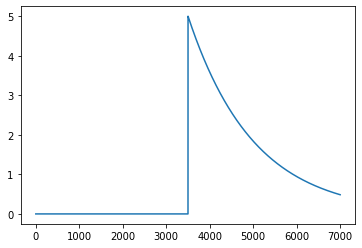

In [7]:
baseline_c=[baseline]*7000
baseline_c=np.array(baseline_c)
A = baseline_c+expo(amp, x, tau)
A=np.array(A)
plt.plot(A)

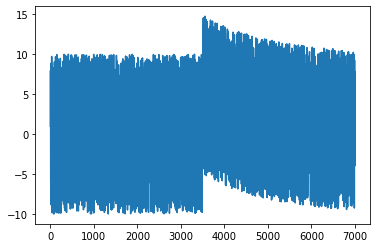

In [8]:
T=A+N
plt.plot(T)

In [9]:
input1=T
trap_new = [0]*length
trap_n=[0]*length
wave_c=[0]*length
wave=[0]*length
trap_new=np.array(trap_new)
for i in range(0, length):
        #single trapezoidal filter for exponential decay
        if i>=(4*rise_time +2*flat_top):
            wave[i]=input1[i]-input1[i-rise_time]-input1[i-rise_time-flat_top]+input1[i-2*rise_time-flat_top]
            wave_c[i] = wave_c[i-1]+wave[i]
            trap_n[i] = trap_n[i-1]+wave_c[i]+tau*wave[i]

for i in range(0, length):
    trap_n[i] = trap_n[i]/(rise_time*tau)
    #trap_o[i]=trap_o[i]/rise_time

## Test of how things changes if we change the order of the sub processes 
This is the order as in Chris's presentation

In [10]:
input1_r=T
trap_n_r=[0]*length
wave_c_r=[0]*length
wave_r=[0]*length

for i in range(0, length):
        #single trapezoidal filter for exponential decay
        if i>=(4*rise_time +2*flat_top):
            trap_n_r[i] = input1_r[i]+trap_n_r[i-1]
            wave_r[i]= input1_r[i]+(1/tau)*trap_n_r[i]
            wave_c_r[i] = wave_c_r[i-1]+wave_r[i]
            wave_r[i]=wave_c_r[i]-wave_c_r[i-rise_time]-wave_c_r[i-rise_time-flat_top]+wave_c_r[i-2*rise_time-flat_top]
for i in range(0, length):
    wave_r[i] = wave_r[i]/(rise_time)

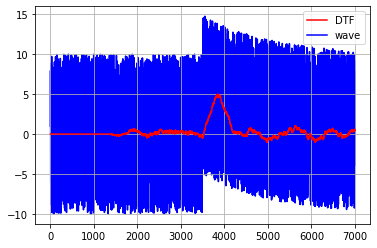

In [11]:
plt.plot(wave_r, color='r', label='DTF', zorder=2)
##plt.plot(trap_o, color='g', label='DTF inverted', zorder=1)
plt.plot(T, color='b', label='wave', zorder=0)
plt.legend()
plt.grid()
plt.show()


## Everything looks same as expected GREAT!!

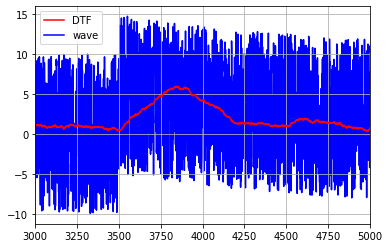

In [15]:
plt.plot(trap_n, color='r', label='DTF', zorder=2)
##plt.plot(trap_o, color='g', label='DTF inverted', zorder=1)
plt.plot(T, color='b', label='wave', zorder=0)
plt.legend()
plt.xlim(3000,5000)
plt.grid()
plt.show()
